
# AAG01 (Parte 1)

Implementar funções que plotem **CDFs** e **PMFs** a partir de amostras **discretas** e **contínuas** passadas como parâmetro de entrada.

## Regras:
1. A tarefa deverá ser realizada obrigatoriamente no **Jupyter** com o uso de:
   - Blocos de **Markdowns** com comandos de LaTeX;
   - Blocos de código;
   - Blocos com resultados gráficos no ambiente do Jupyter;
   - Gráficos gerados devem ser interpretados e explicados em Markdown.
2. Não são permitidos comandos prontos além dos comandos básicos do Python.
3. Parâmetros de entrada devem ser cuidadosamente escolhidos e especificados para cada tipo de curva (ex.: tempos de processamento, pontuação esportiva, resultados de artigos).
4. Os formatos de entrega devem ser:
   - `.pdf` (exportado do Jupyter);
   - `.ipynb` (código fonte + markdowns).
5. Caso utilizem arquivos de amostras, favor anexá-los também.
6. **Data de entrega:** início da próxima aula.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lendo dataset
df = pd.read_csv("../DataSet/outdoor40.csv")

### Função PMF (Massa de Probabilidade)

$$
P(X=x)=f(x)=Pr(X=x)
$$

In [3]:
def calcular_pmf_discreta(data):
    frequencias = {}
    for valor in data:
        if valor in frequencias:
            frequencias[valor] += 1
        else:
            frequencias[valor] = 1
    total = len(data)
    pmf = {valor: frequencia / total for valor, frequencia in frequencias.items()}
    return pmf

Usarei uma amostra simplificada para testar a função

In [4]:
amostra_discreta = [1, 2, 3, 3, 4, 4, 4, 4, 5, 6]
pmf_discreta = calcular_pmf_discreta(amostra_discreta)
print ("PMF:", pmf_discreta)

PMF: {1: 0.1, 2: 0.1, 3: 0.2, 4: 0.4, 5: 0.1, 6: 0.1}


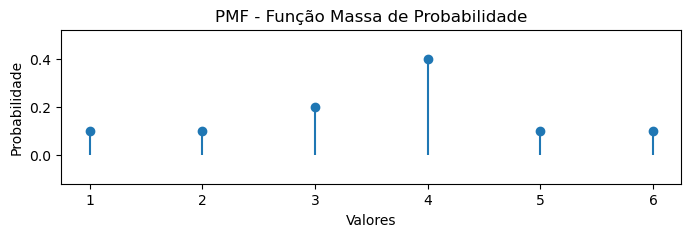

In [5]:
valores = list(pmf_discreta.keys())
probabilidades = list(pmf_discreta.values())
plt.figure(figsize=(8, 2))
plt.margins(y=0.3)
markerline, stemlines, baseline = plt.stem(valores, probabilidades)
plt.setp(baseline, visible=False)
plt.title("PMF - Função Massa de Probabilidade")
plt.xlabel("Valores")
plt.ylabel("Probabilidade")
plt.show()

### Função CDF (Distribuição Acumulada)

$$
F(x) = P(X \leq x) = \sum_{k=0}^{x} f(k)
$$

In [7]:
def calcular_cdf_discreta(data):
    pmf = calcular_pmf_discreta(data)
    cdf = {}
    soma_acumulada = 0
    for valor in sorted(pmf.keys()):
        soma_acumulada += pmf[valor]
        cdf[valor] = soma_acumulada
    return cdf

Novamente usarei uma amostra simplificada para testar a função

In [ ]:
amostra_discreta = [1, 2, 3, 3, 4, 4, 4, 4, 5, 6]
cdf_discreta = calcular_cdf_discreta(amostra_discreta)
print ("CDF:", cdf_discreta)

CDF: {1: 0.1, 2: 0.2, 3: 0.4, 4: 0.8, 5: 0.9, 6: 1.0}


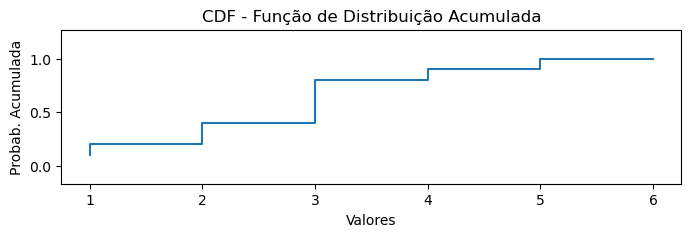

In [9]:
valores = list(cdf_discreta.keys())
probabilidades = list(cdf_discreta.values())
plt.figure(figsize=(8, 2))
plt.margins(y=0.3)
plt.step(valores, probabilidades)
plt.title("CDF - Função de Distribuição Acumulada")
plt.xlabel("Valores")
plt.ylabel("Probab. Acumulada")
plt.show()

### PDF (Função de Densidade de Probabilidade)
$$
f_X(x) = \frac{1}{n \cdot h} \sum_{i=1}^n I\left(|x - x_i| \leq \frac{h}{2}\right)
$$

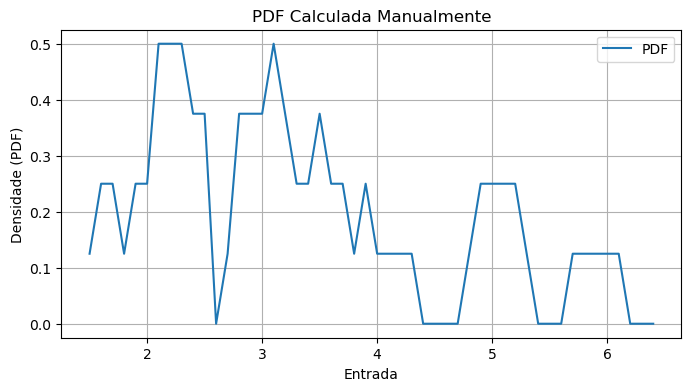

In [ ]:
# Amostra contínua
amostra_continua = [1.5, 2.3, 2.31, 2.32, 2.9, 3.7, 3.5, 2.1, 3.0, 3.0, 4.1, 1.8, 3.3, \
    5, 5.1, 5.9]

# Função para calcular a PDF manualmente
def calcular_pdf(amostra, x, largura_janela=0.5):
    n = len(amostra)  # Tamanho da amostra
    contador = sum(1 for xi in amostra if abs(x - xi) <= largura_janela / 2)
    densidade = contador / (n * largura_janela)
    return densidade

# Valores de x para cálculo
x_valores = [min(amostra_continua) + i * 0.1 for i in range(50)]  # Gera valores de x

# Calcular PDF
pdf_valores = [calcular_pdf(amostra_continua, x) for x in x_valores]

plt.figure(figsize=(8, 4))
plt.plot(x_valores, pdf_valores, label="PDF")
plt.xlabel("Entrada")
plt.ylabel("Densidade (PDF)")
plt.title("PDF Calculada Manualmente")
plt.legend()
plt.grid(True)
plt.show()


### CDF (Função de Distribuição Acumulada)
$$
F_X(x) = \frac{1}{n} \sum_{i=1}^n I(x_i \leq x)
$$

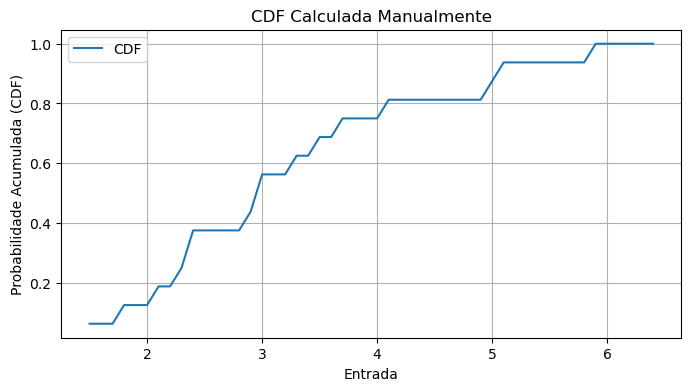

In [ ]:
# Amostra contínua
amostra_continua = [1.5, 2.3, 2.31, 2.32, 2.9, 3.7, 3.5, 2.1, 3.0, 3.0, 4.1, 1.8, 3.3, \
    5, 5.1, 5.9]

# Função para calcular a CDF manualmente
def calcular_cdf(amostra, x):
    n = len(amostra)  # Tamanho da amostra
    contador = sum(1 for xi in amostra if xi <= x)
    probabilidade_acumulada = contador / n
    return probabilidade_acumulada

# Valores de x para cálculo
x_valores = [min(amostra_continua) + i * 0.1 for i in range(50)]  # Gera valores de x

# Calcular CDF
cdf_valores = [calcular_cdf(amostra_continua, x) for x in x_valores]

plt.figure(figsize=(8, 4))
plt.plot(x_valores, cdf_valores, label="CDF")
plt.xlabel("Entrada")
plt.ylabel("Probabilidade Acumulada (CDF)")
plt.title("CDF Calculada Manualmente")
plt.legend()
plt.grid(True)
plt.show()
